In [1]:
import pandas as pd
from pandas import read_csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 自定义读取数据
def read_data(path, col_index, col_name): 
    # path：路径
    # col_index：第几列（从0开始）
    # col_name：列名
    df = read_csv(path, usecols=[col_index], encoding='gbk')
    data = df[col_name]
    return df, data

In [3]:
# 可视化四个地震带的地震震级/能量折线图
def show( d1,d2, d3, d4):   
    fig = plt.figure(figsize=(30,40))
    ax1 = fig.add_subplot(411) # “411”表示“4×1网格，第一子图”
    ax1.set_title('ThePacificOcean', fontsize=15, color='b')
    ax1.plot(d1)
    ax2 = fig.add_subplot(412)
    ax2.set_title('QinghaiTibetPlateau', fontsize=15, color='b')
    ax2.plot(d2)
    ax3 = fig.add_subplot(413)
    ax3.set_title('NorthWest', fontsize=15, color='b')
    ax3.plot(d3)
    ax4 = fig.add_subplot(414)
    ax4.set_title('NorthChina', fontsize=15, color='b')
    ax4.plot(d4)
    plt.show()

data_ThePacificOcean:51
data_QinghaiTibetPlateau:51
data_NorthWest:51
data_NorthChina:26


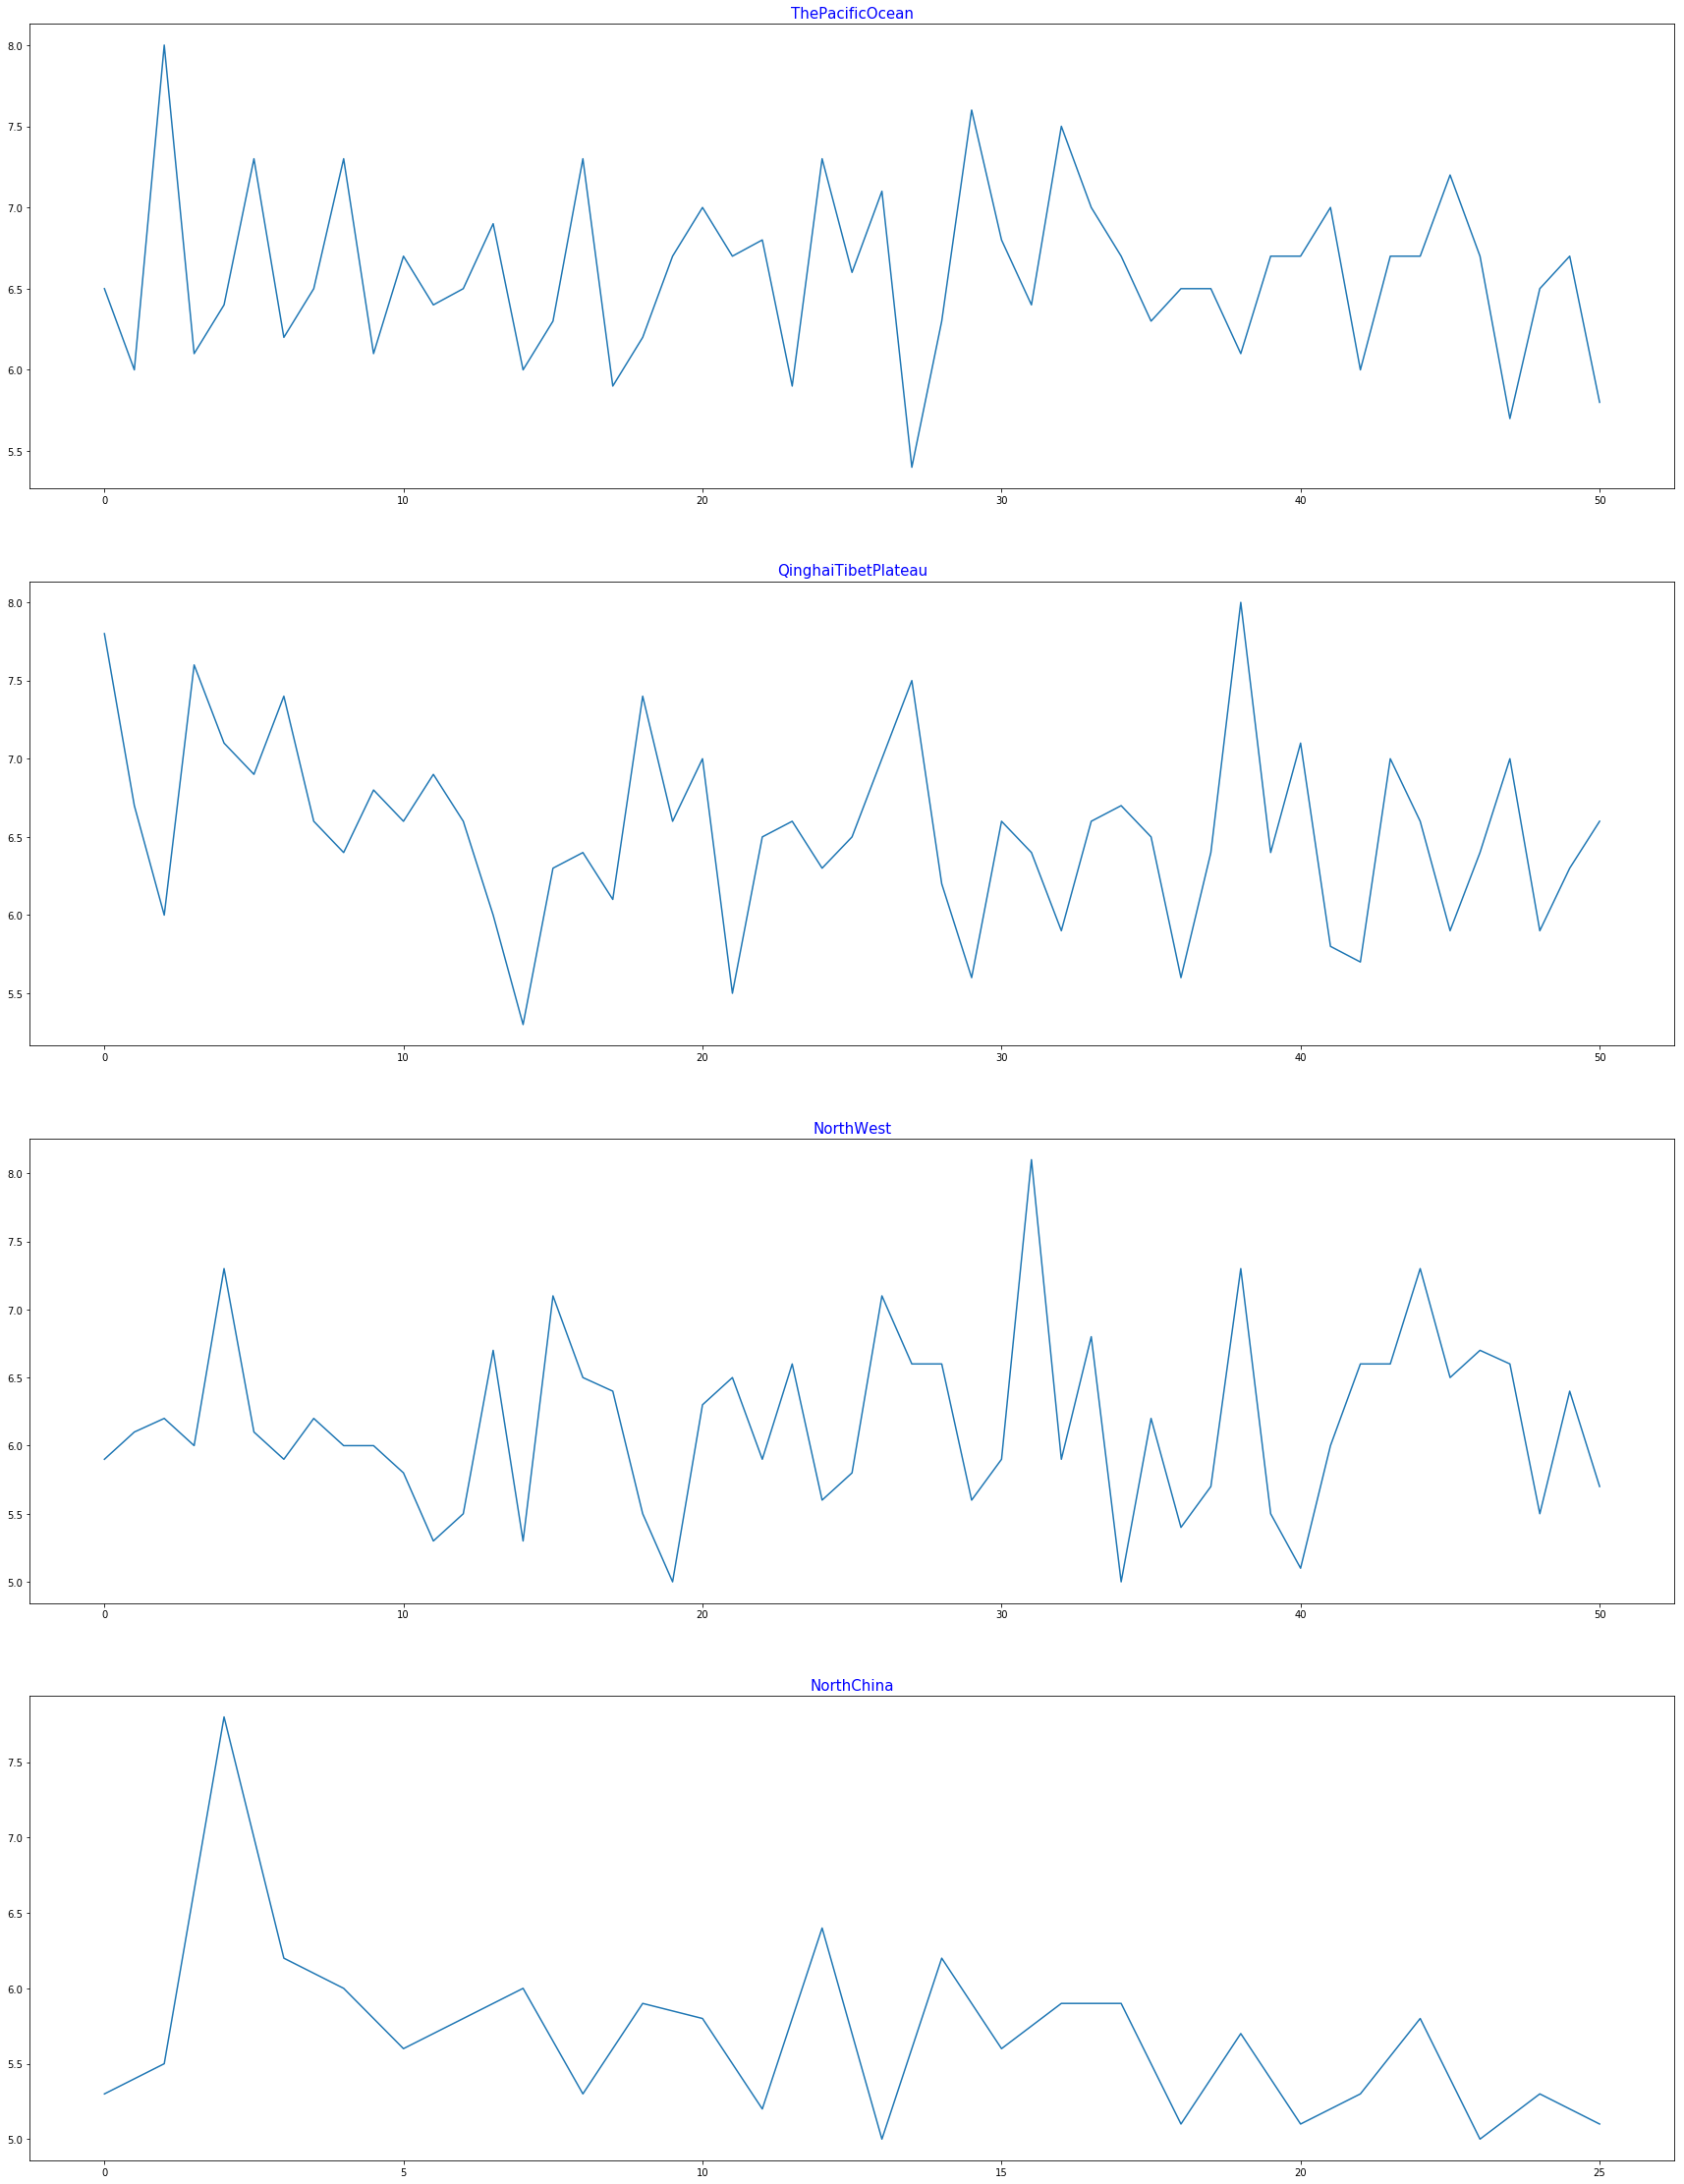

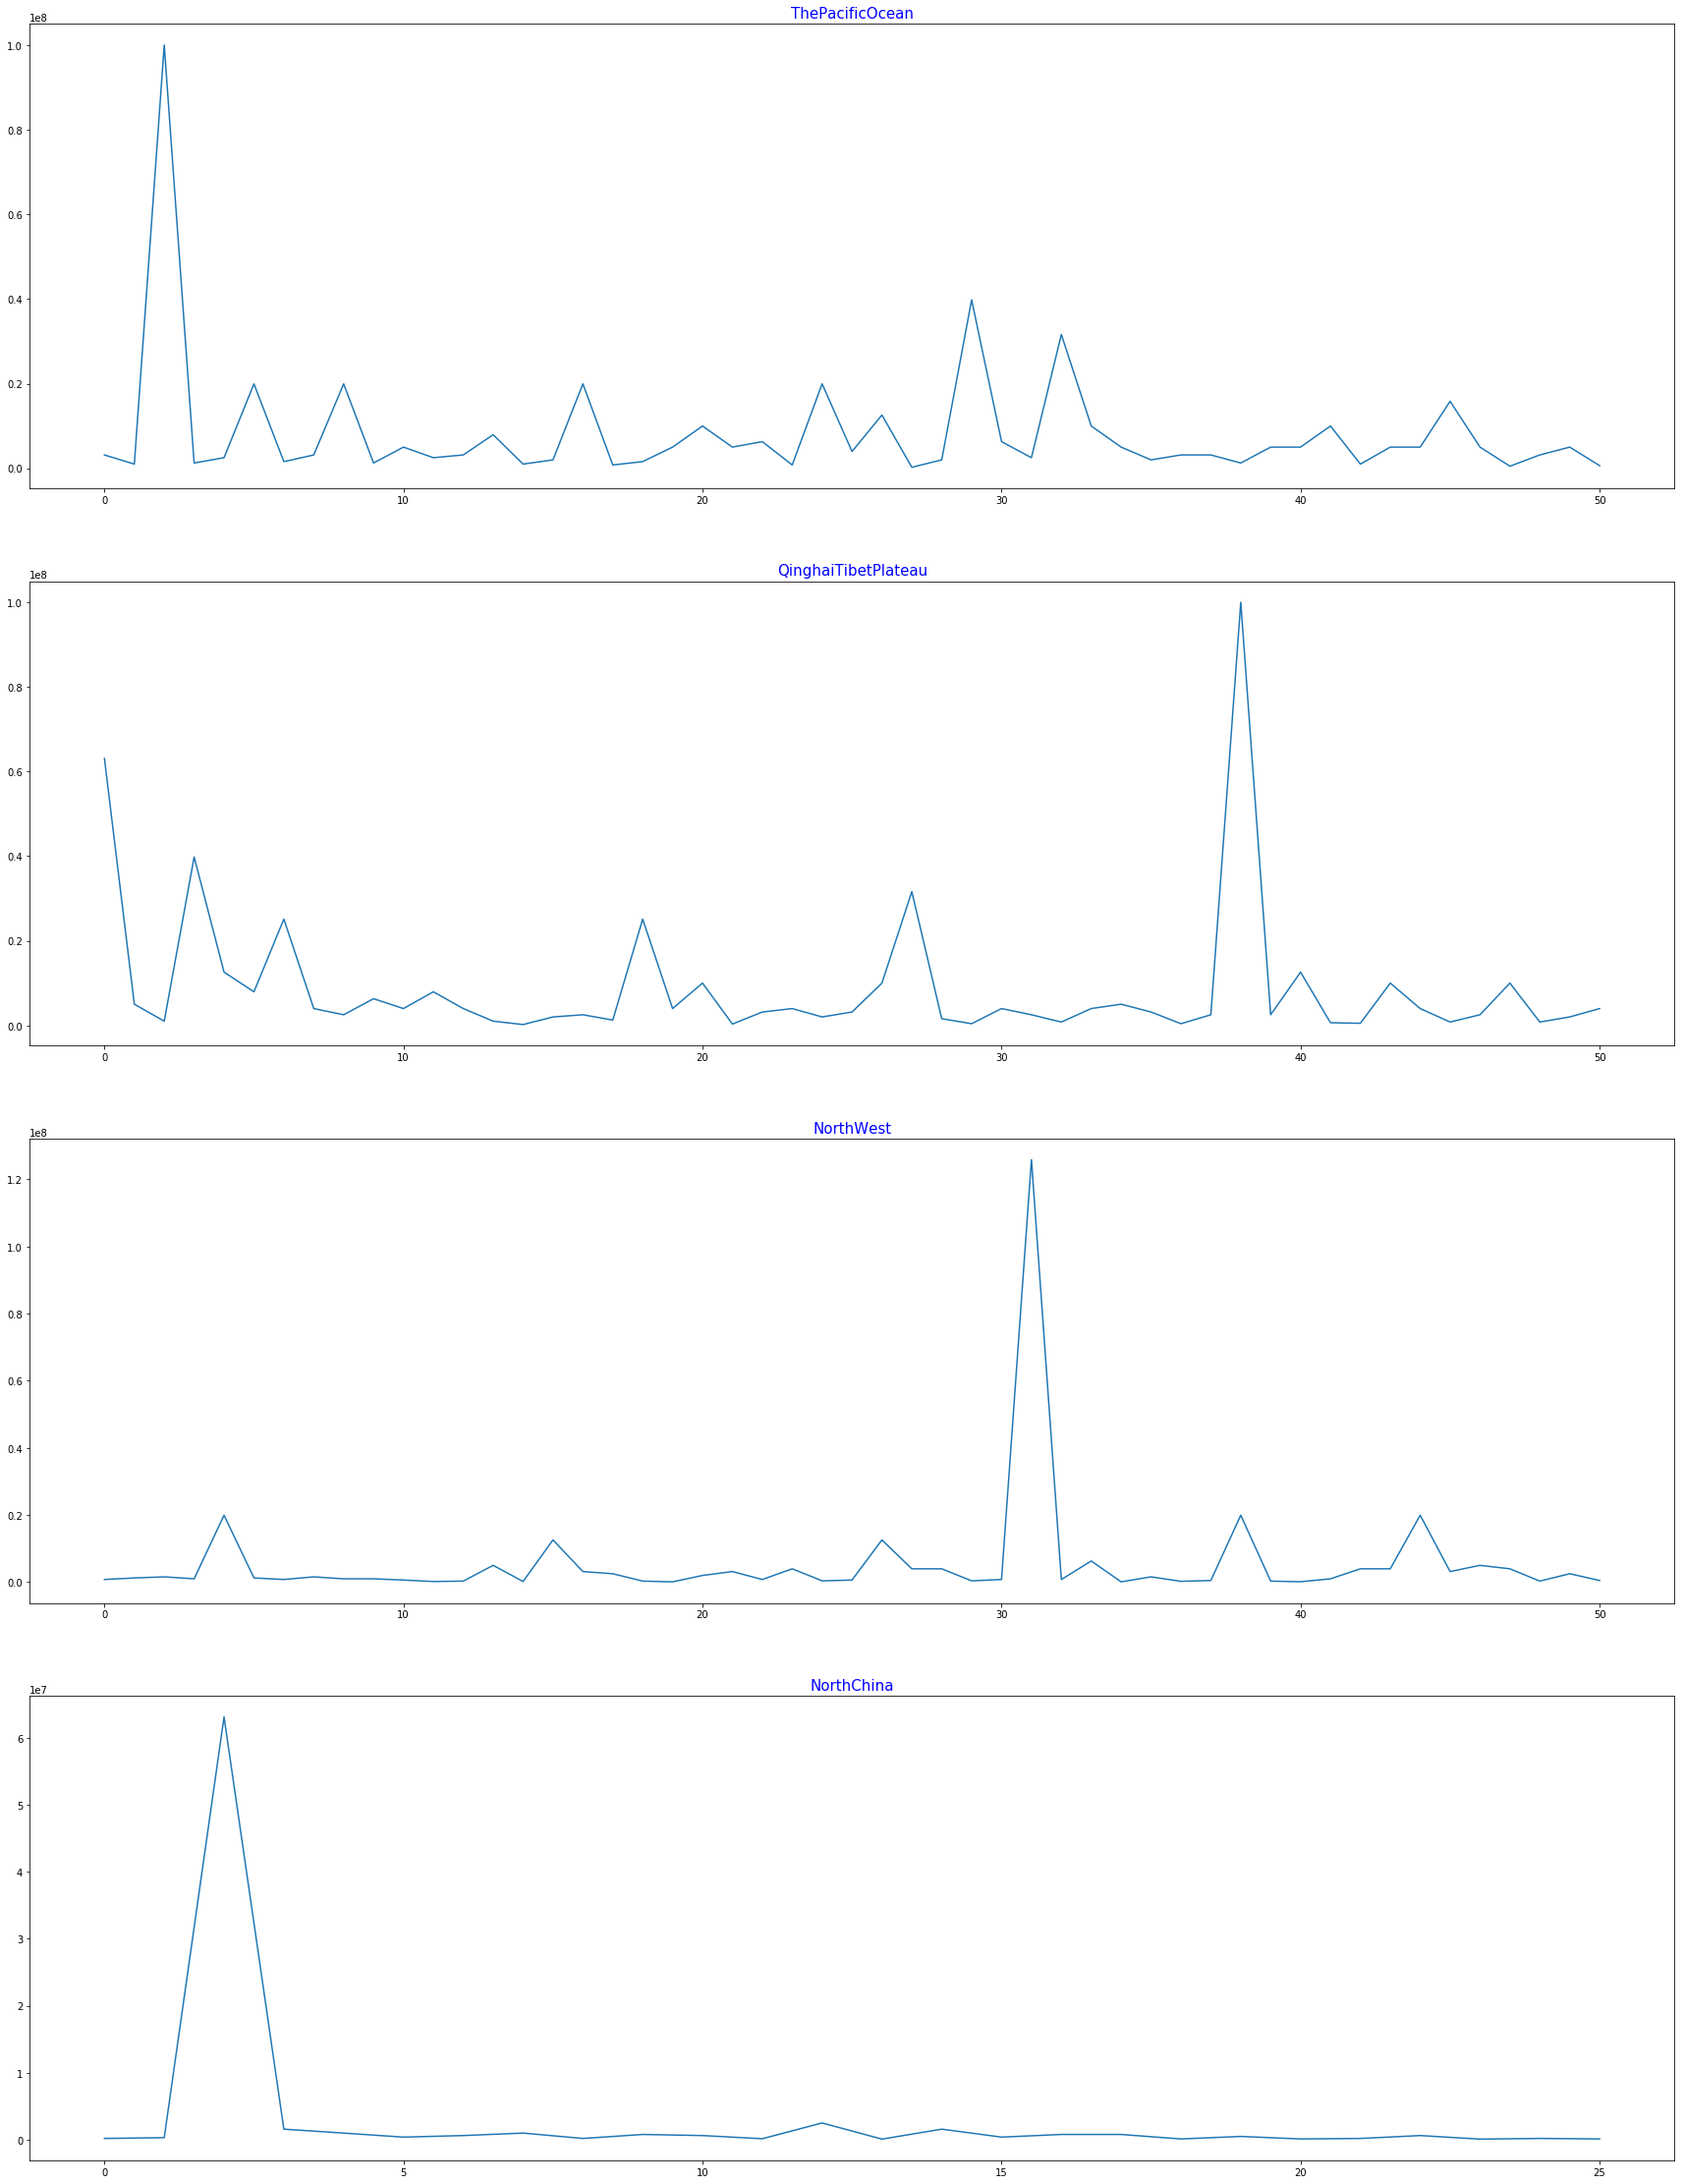

In [4]:
# 载入划分好的四个地震带数据（1970-2020），并可视化折线图
df_ThePacificOcean,data_ThePacificOcean = read_data('./data/earthquake_year/ThePacificOcean.csv', 2, '震级')
df_QinghaiTibetPlateau,data_QinghaiTibetPlateau = read_data('./data/earthquake_year/QinghaiTibetPlateau.csv', 2, '震级')
df_NorthWest,data_NorthWest = read_data('./data/earthquake_year/NorthWest.csv', 2, '震级')
df_NorthChina,data_NorthChina = read_data('./data/earthquake_year/NorthChina.csv', 2, '震级')
df_ThePacificOcean_energy,data_ThePacificOcean_energy = read_data('./data/earthquake_year/ThePacificOcean.csv', 3, '能量')
df_QinghaiTibetPlateau_energy,data_QinghaiTibetPlateau_energy  = read_data('./data/earthquake_year/QinghaiTibetPlateau.csv', 3, '能量')
df_NorthWest_energy,data_NorthWest_energy  = read_data('./data/earthquake_year/NorthWest.csv', 3, '能量')
df_NorthChina_energy,data_NorthChina_energy  = read_data('./data/earthquake_year/NorthChina.csv', 3, '能量')
print ("data_ThePacificOcean:%d"%len(data_ThePacificOcean))
print ("data_QinghaiTibetPlateau:%d"%len(data_QinghaiTibetPlateau)) 
print ("data_NorthWest:%d"%len(data_NorthWest)) 
print ("data_NorthChina:%d"%len(data_NorthChina)) 

show(data_ThePacificOcean,data_QinghaiTibetPlateau,data_NorthWest,data_NorthChina)
show(data_ThePacificOcean_energy,data_QinghaiTibetPlateau_energy,data_NorthWest_energy,data_NorthChina_energy)

In [5]:
# 自定义一阶差分处理
def diff_1(df,col):
    df['eq_diff_1'] =  df[col].diff(1)
    # 差分后出现了NaN，导致plt可视化时报错，进一步处理NaN值，去除即可
    df.dropna(axis=0, how='any', inplace=True)
    df.isnull().any() # 判断列是否有 NaN -> False 无
    return df

In [6]:
# 一阶差分
df_ThePacificOcean = diff_1(df_ThePacificOcean,'震级')
df_QinghaiTibetPlateau = diff_1(df_QinghaiTibetPlateau,'震级')
df_NorthWest = diff_1(df_NorthWest,'震级')
df_NorthChina = diff_1(df_NorthChina,'震级')
df_ThePacificOcean_energy = diff_1(df_ThePacificOcean_energy,'能量')
df_QinghaiTibetPlateau_energy = diff_1(df_QinghaiTibetPlateau_energy,'能量')
df_NorthWest_energy = diff_1(df_NorthWest_energy,'能量')
df_NorthChina_energy = diff_1(df_NorthChina_energy,'能量')

In [7]:
# 打印看看一阶差分结果
print(df_ThePacificOcean)
print(df_QinghaiTibetPlateau)
print(df_NorthWest)
print(df_NorthChina)
print(df_ThePacificOcean_energy)
print(df_QinghaiTibetPlateau_energy)
print(df_NorthWest_energy)
print(df_NorthChina_energy)

     震级  eq_diff_1
1   6.0       -0.5
2   8.0        2.0
3   6.1       -1.9
4   6.4        0.3
5   7.3        0.9
6   6.2       -1.1
7   6.5        0.3
8   7.3        0.8
9   6.1       -1.2
10  6.7        0.6
11  6.4       -0.3
12  6.5        0.1
13  6.9        0.4
14  6.0       -0.9
15  6.3        0.3
16  7.3        1.0
17  5.9       -1.4
18  6.2        0.3
19  6.7        0.5
20  7.0        0.3
21  6.7       -0.3
22  6.8        0.1
23  5.9       -0.9
24  7.3        1.4
25  6.6       -0.7
26  7.1        0.5
27  5.4       -1.7
28  6.3        0.9
29  7.6        1.3
30  6.8       -0.8
31  6.4       -0.4
32  7.5        1.1
33  7.0       -0.5
34  6.7       -0.3
35  6.3       -0.4
36  6.5        0.2
37  6.5        0.0
38  6.1       -0.4
39  6.7        0.6
40  6.7        0.0
41  7.0        0.3
42  6.0       -1.0
43  6.7        0.7
44  6.7        0.0
45  7.2        0.5
46  6.7       -0.5
47  5.7       -1.0
48  6.5        0.8
49  6.7        0.2
50  5.8       -0.9
     震级  eq_diff_1
1   6.7     

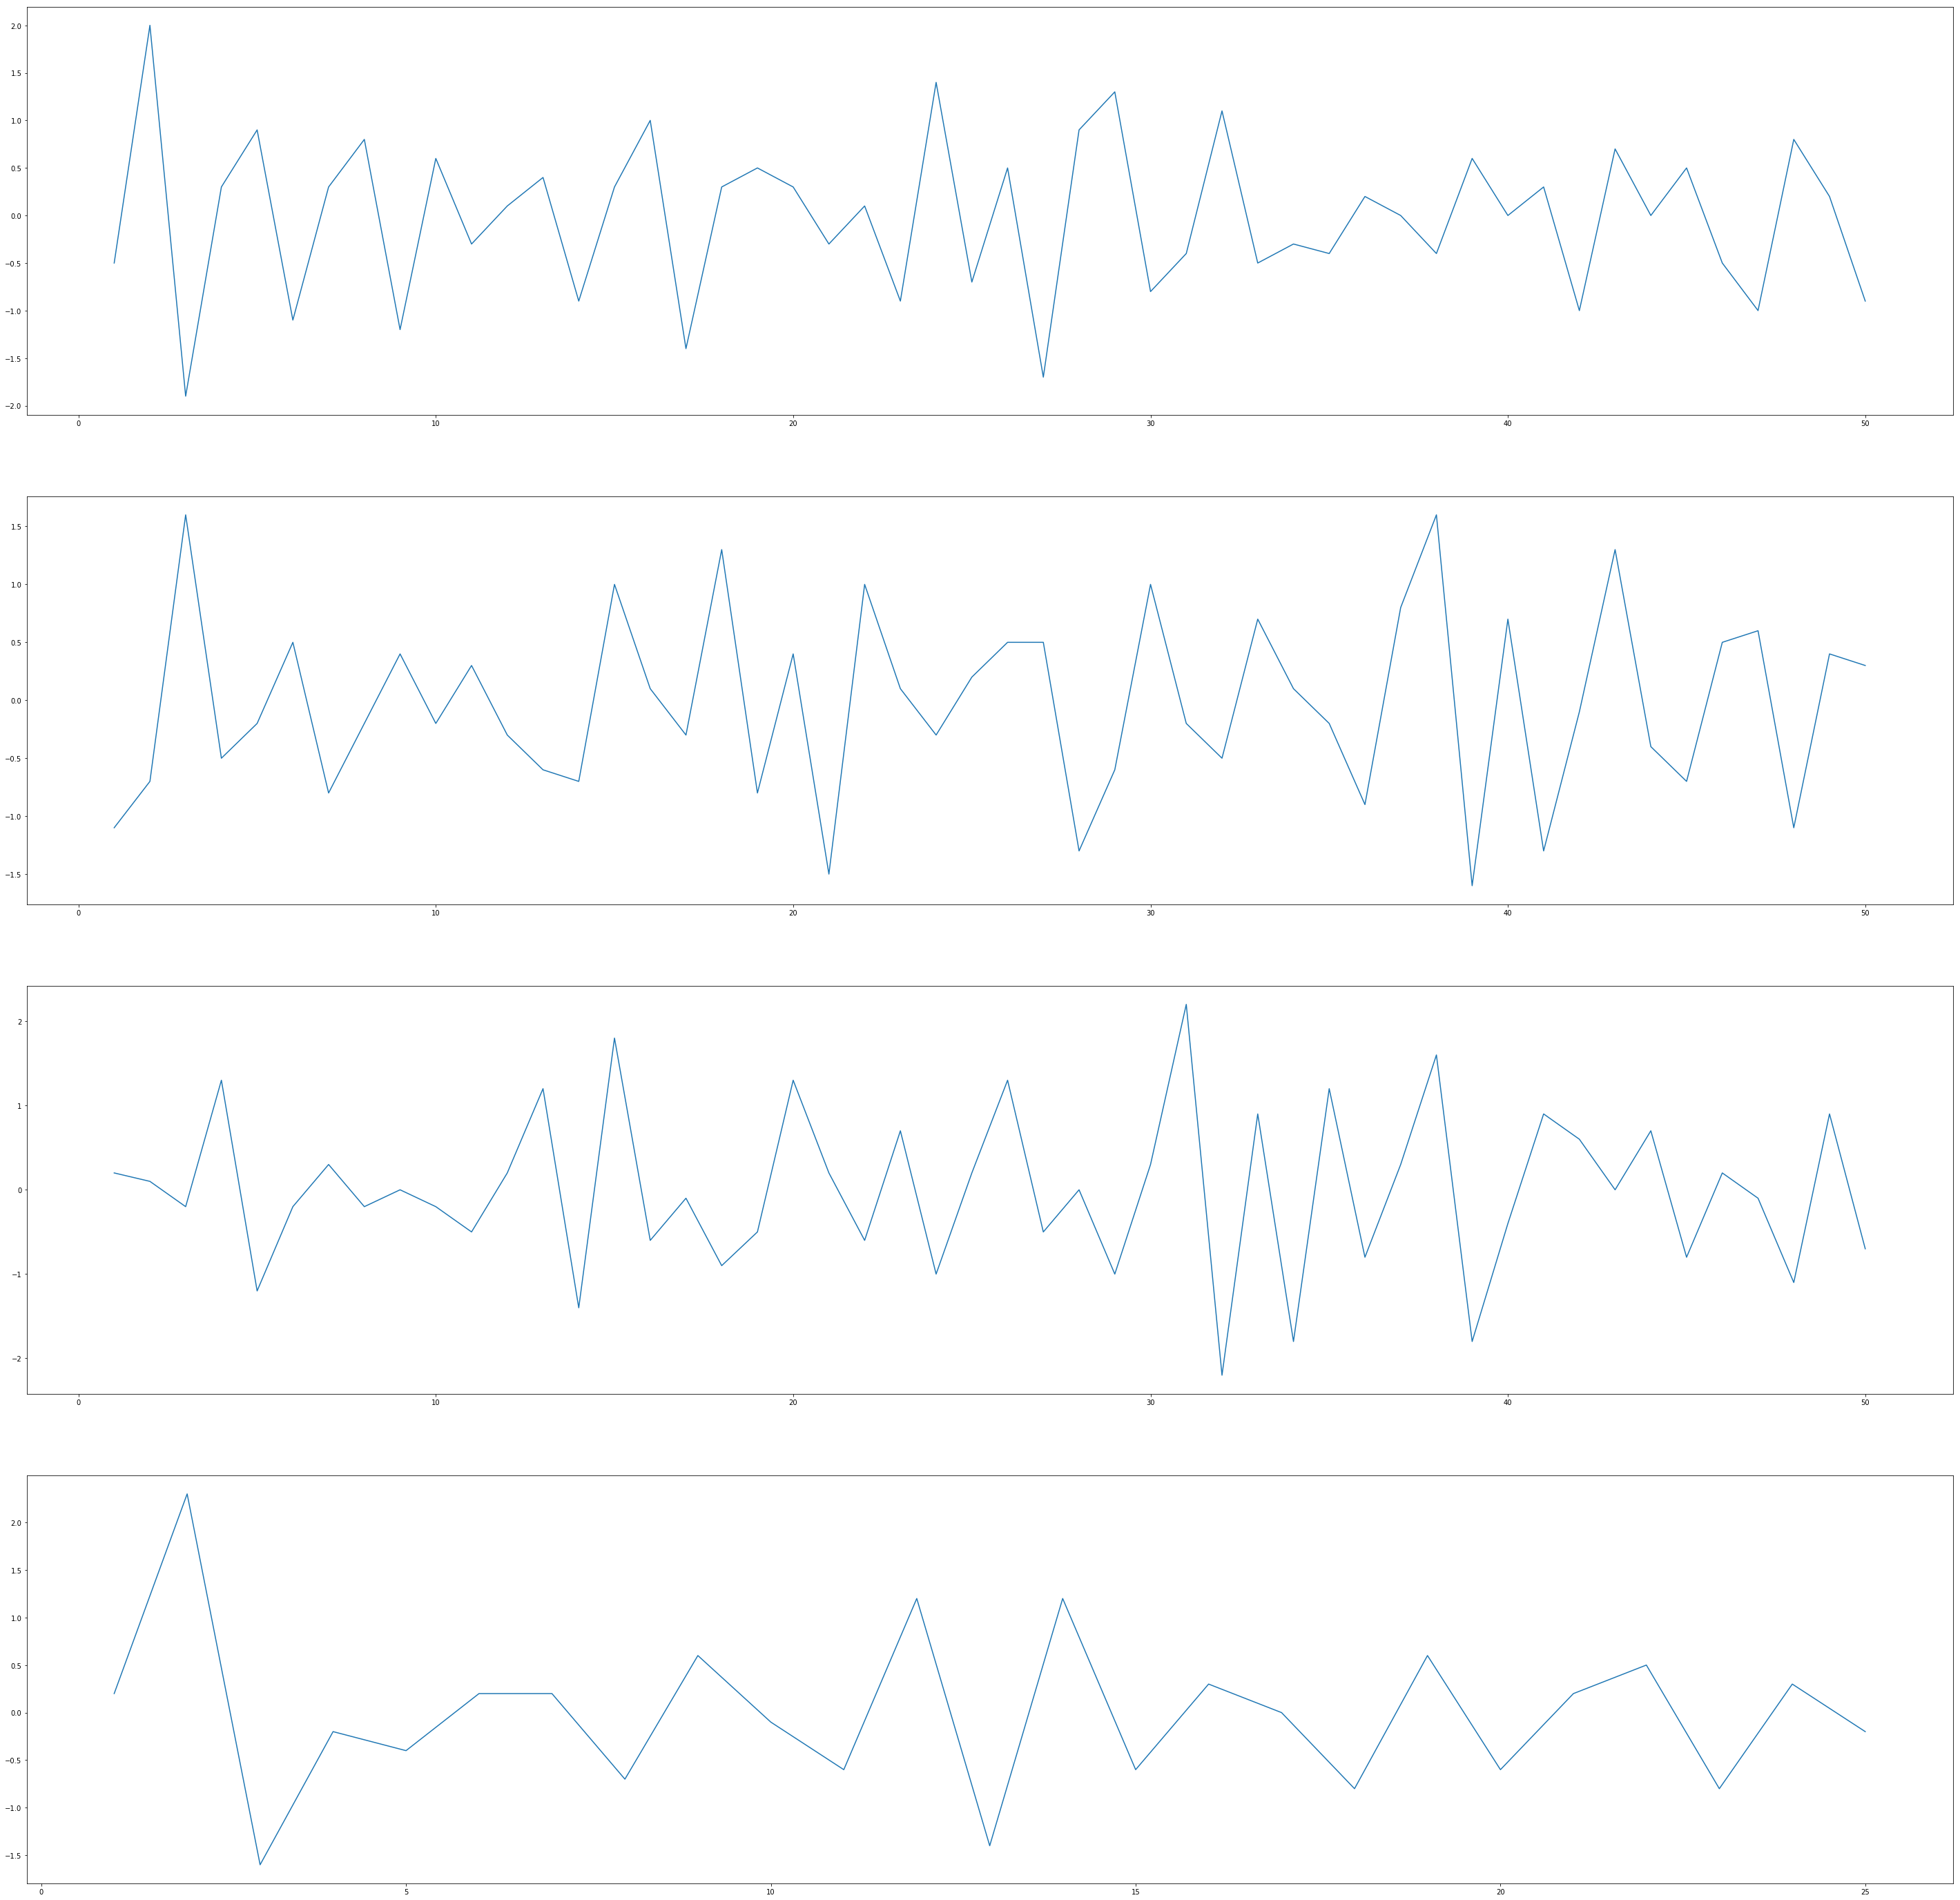

In [8]:
# 一阶差分可视化 
fig = plt.figure(figsize=(50,50))
ax1 = fig.add_subplot(411) # “131”表示“1×3网格，第一子图”
ax1.plot(df_ThePacificOcean['eq_diff_1'])
ax2 = fig.add_subplot(412)
ax2.plot(df_QinghaiTibetPlateau['eq_diff_1'])
ax3 = fig.add_subplot(413)
ax3.plot(df_NorthWest['eq_diff_1'])
ax4 = fig.add_subplot(414)
ax4.plot(df_NorthChina['eq_diff_1'])
plt.show()

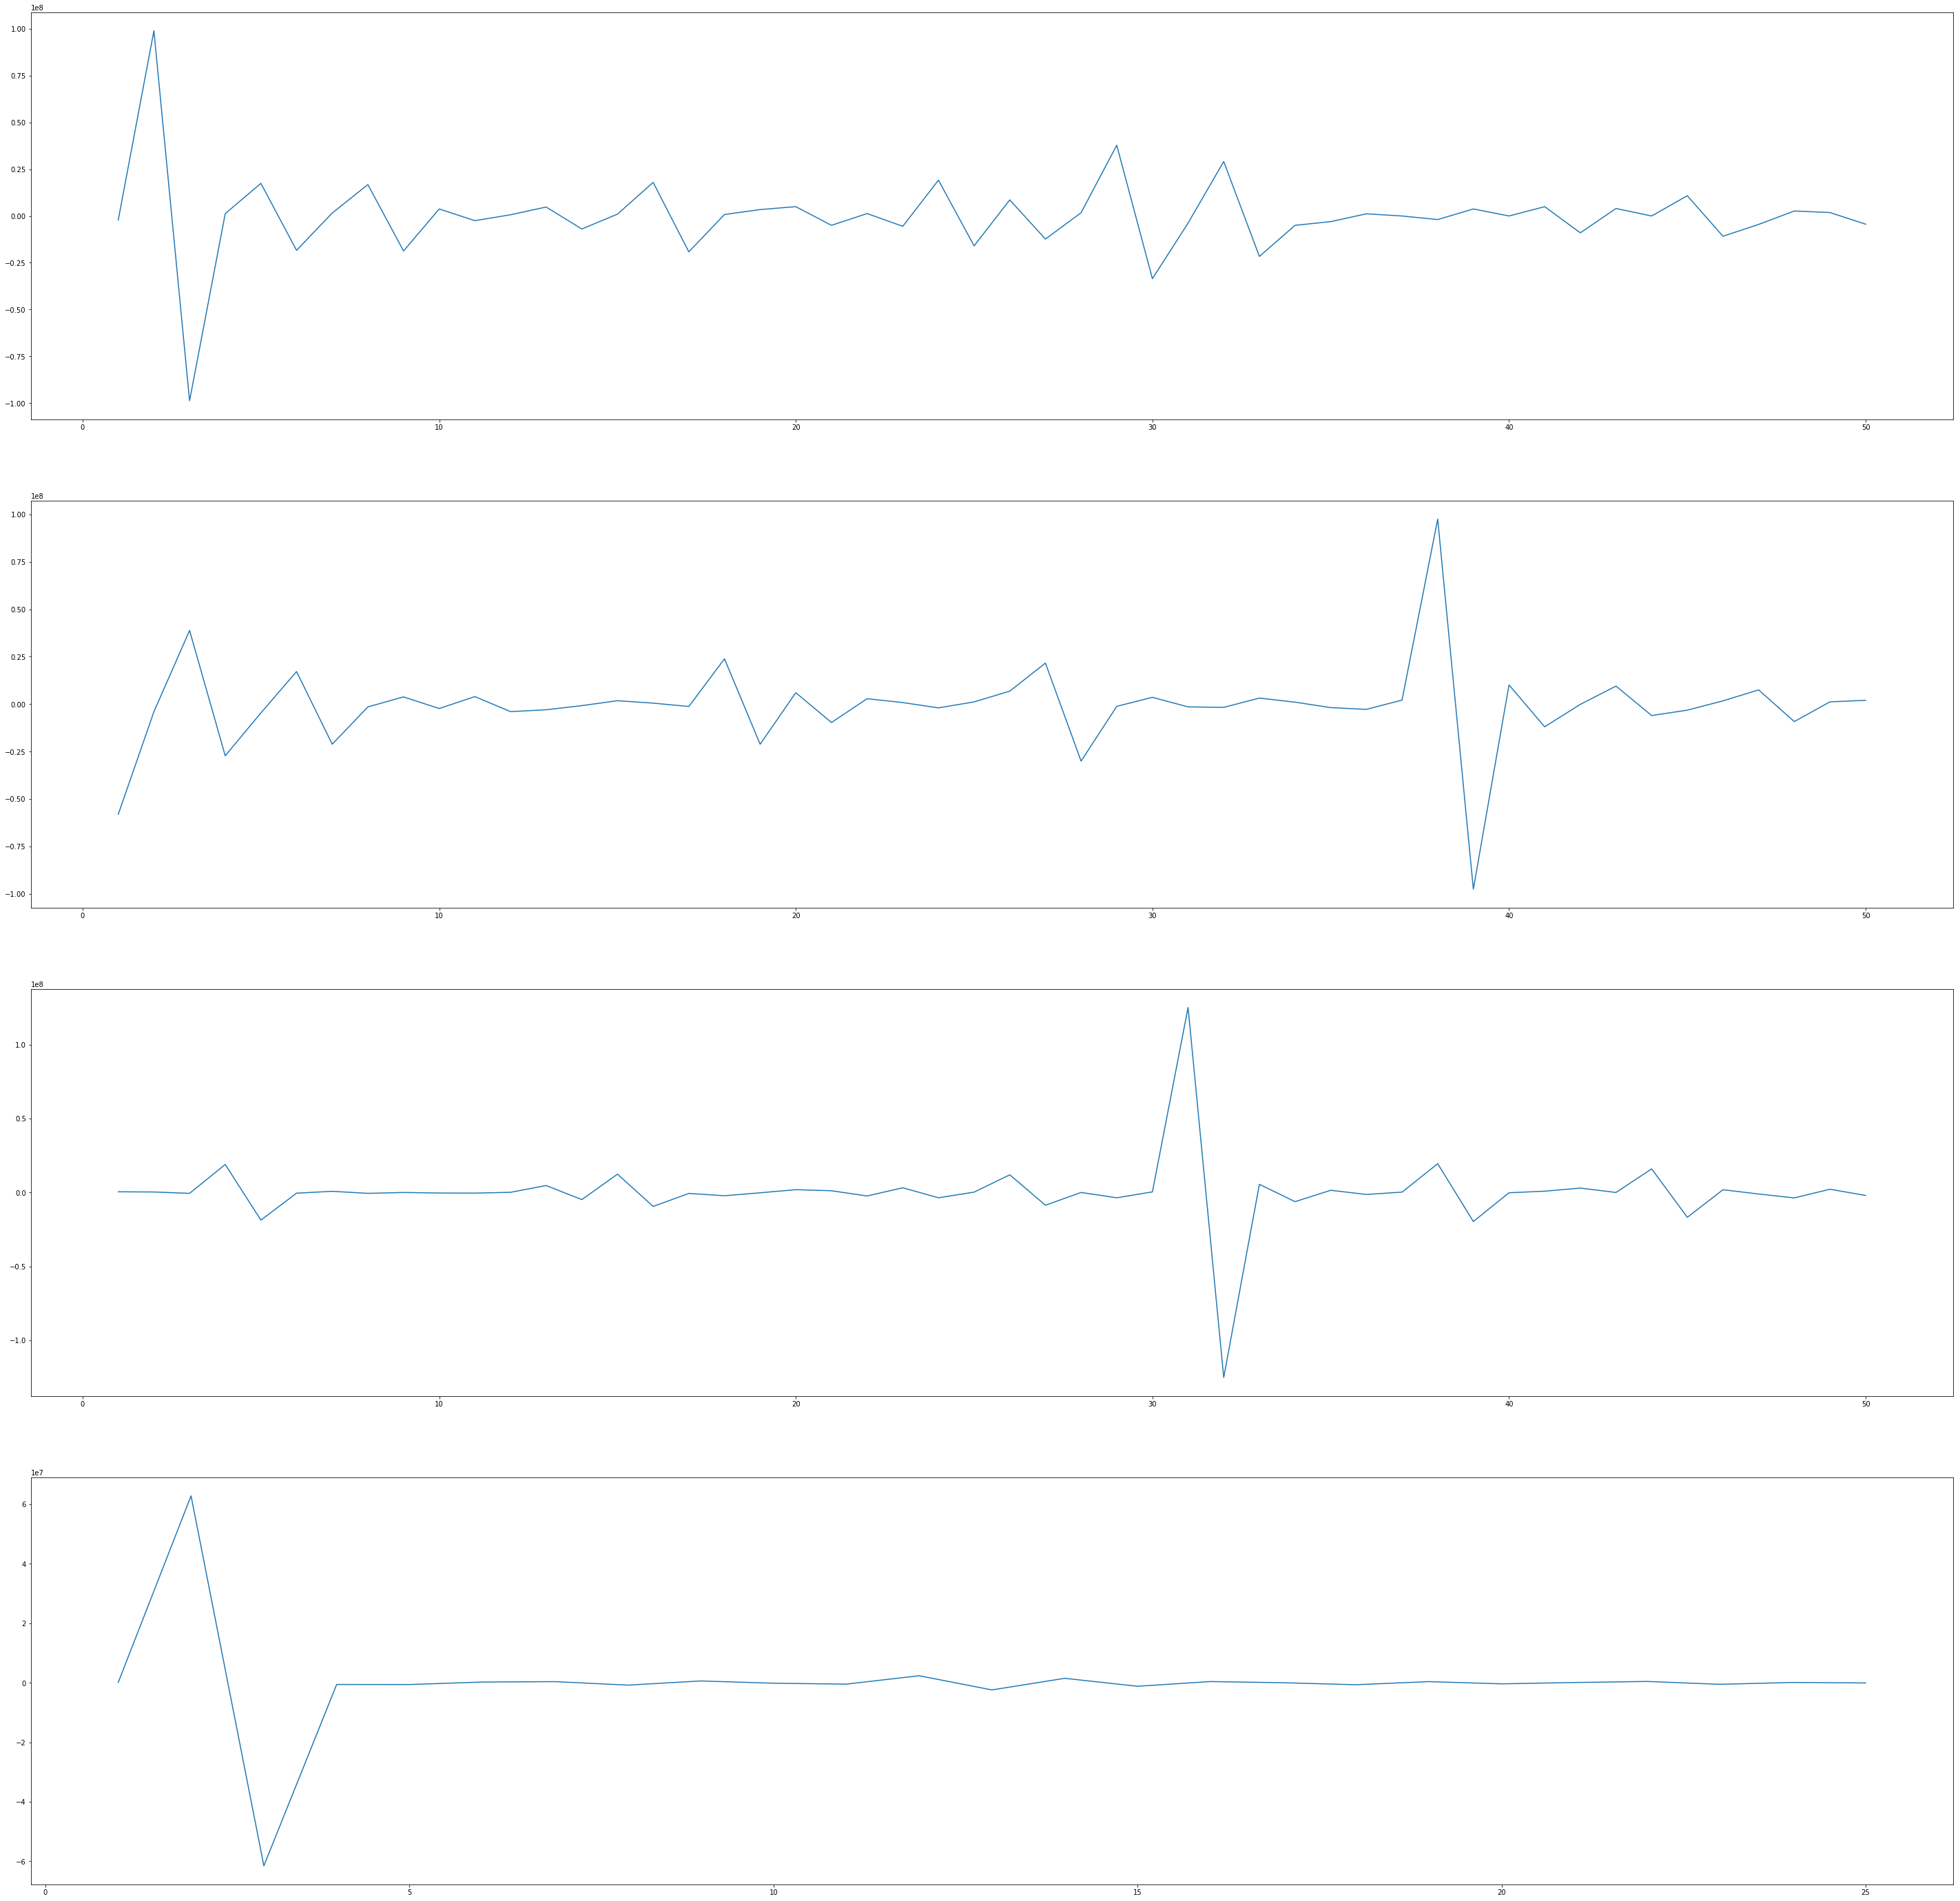

In [9]:
fig = plt.figure(figsize=(50,50))
ax1 = fig.add_subplot(411) # “131”表示“1×3网格，第一子图”
ax1.plot(df_ThePacificOcean_energy['eq_diff_1'])
ax2 = fig.add_subplot(412)
ax2.plot(df_QinghaiTibetPlateau_energy['eq_diff_1'])
ax3 = fig.add_subplot(413)
ax3.plot(df_NorthWest_energy['eq_diff_1'])
ax4 = fig.add_subplot(414)
ax4.plot(df_NorthChina_energy['eq_diff_1'])
plt.show()

In [13]:
# 自定义MA（1）模型，指定一阶差分
def model_MA(df,str):
    model = sm.tsa.ARIMA(df[str], order=(0, 1, 1)) # MA(1）模型 ，指定一阶差分
    results = model.fit()
    predict_sunspots = results.predict(dynamic=False)
    fig, ax = plt.subplots(figsize=(50, 8))
    ax = df['eq_diff_1'].plot(ax=ax)
    predict_sunspots.plot(ax=ax)
    plt.show()
    return results

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


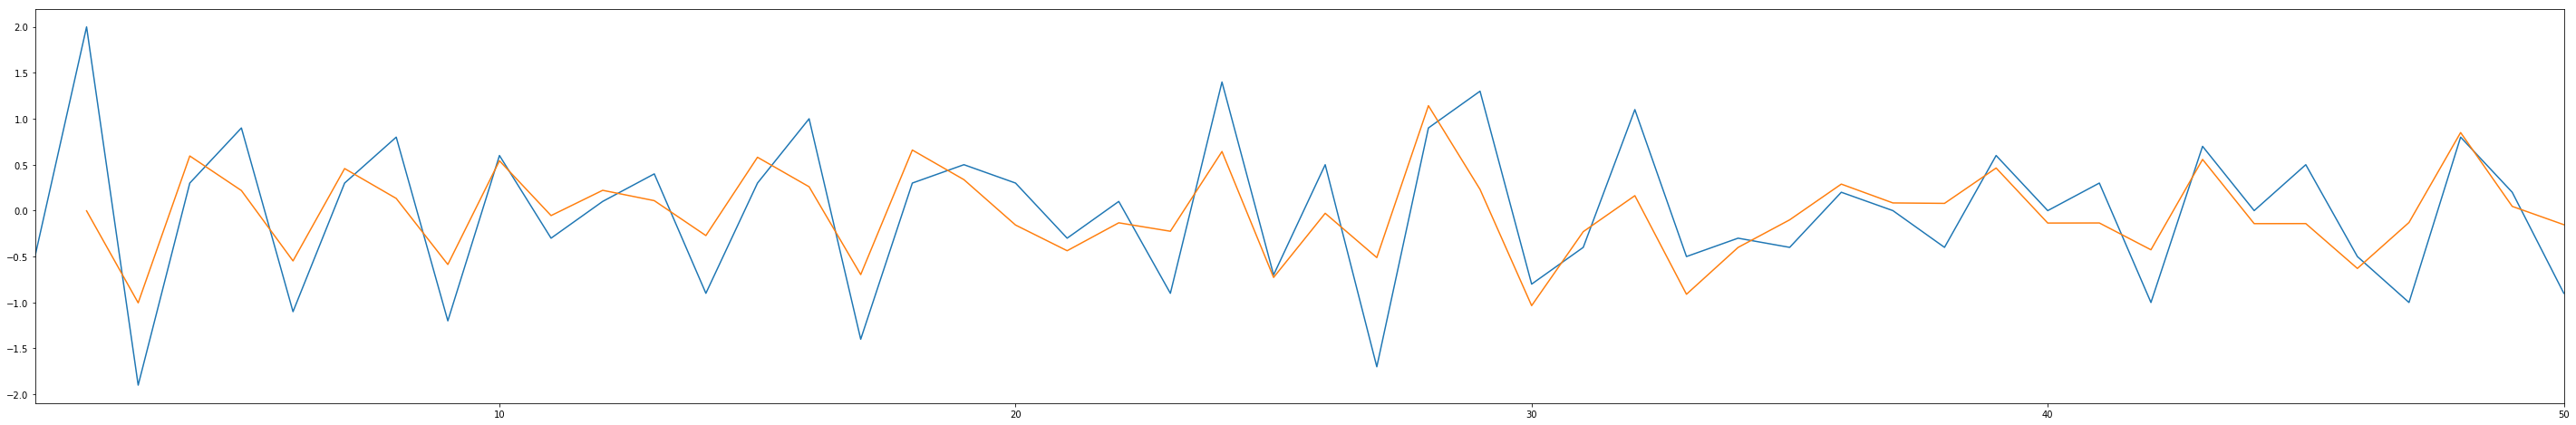

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


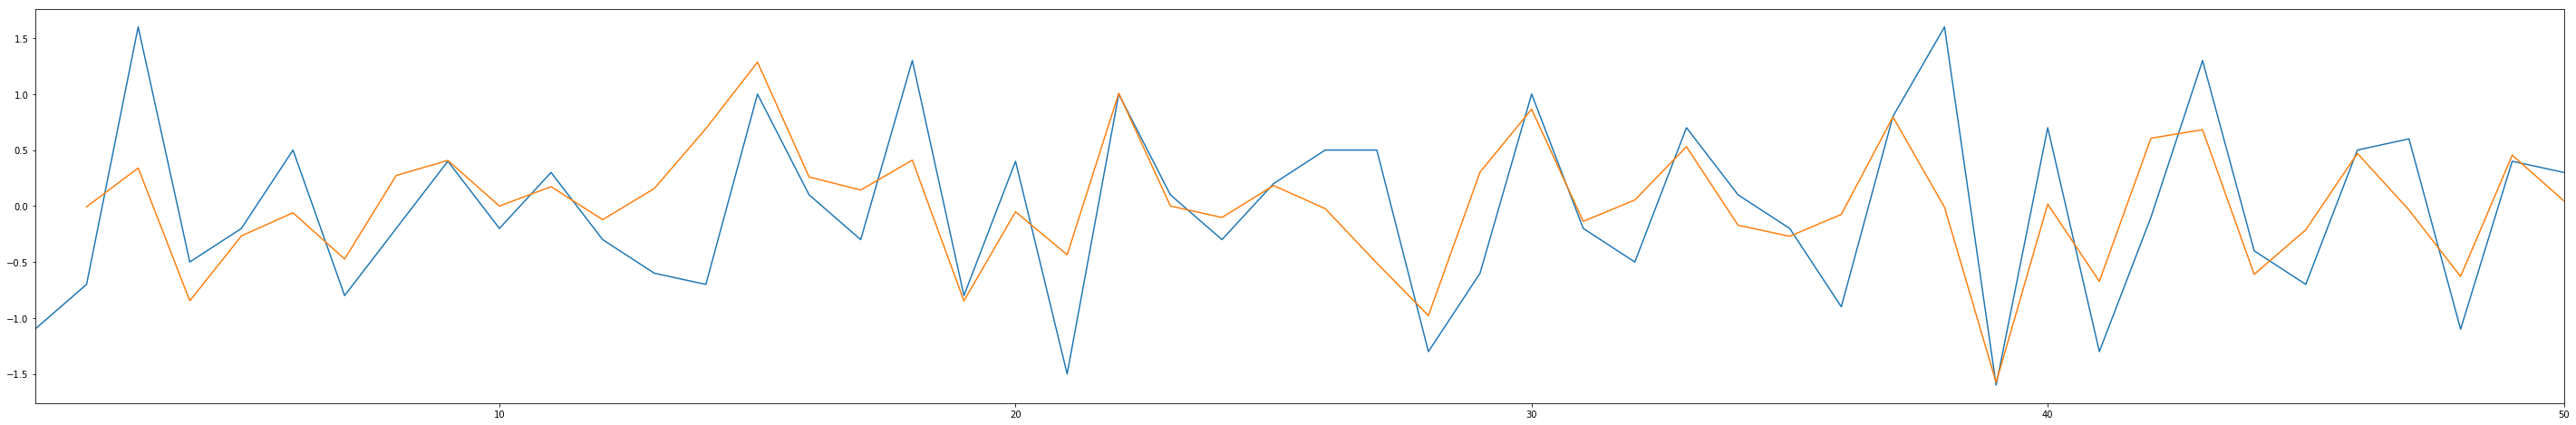

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


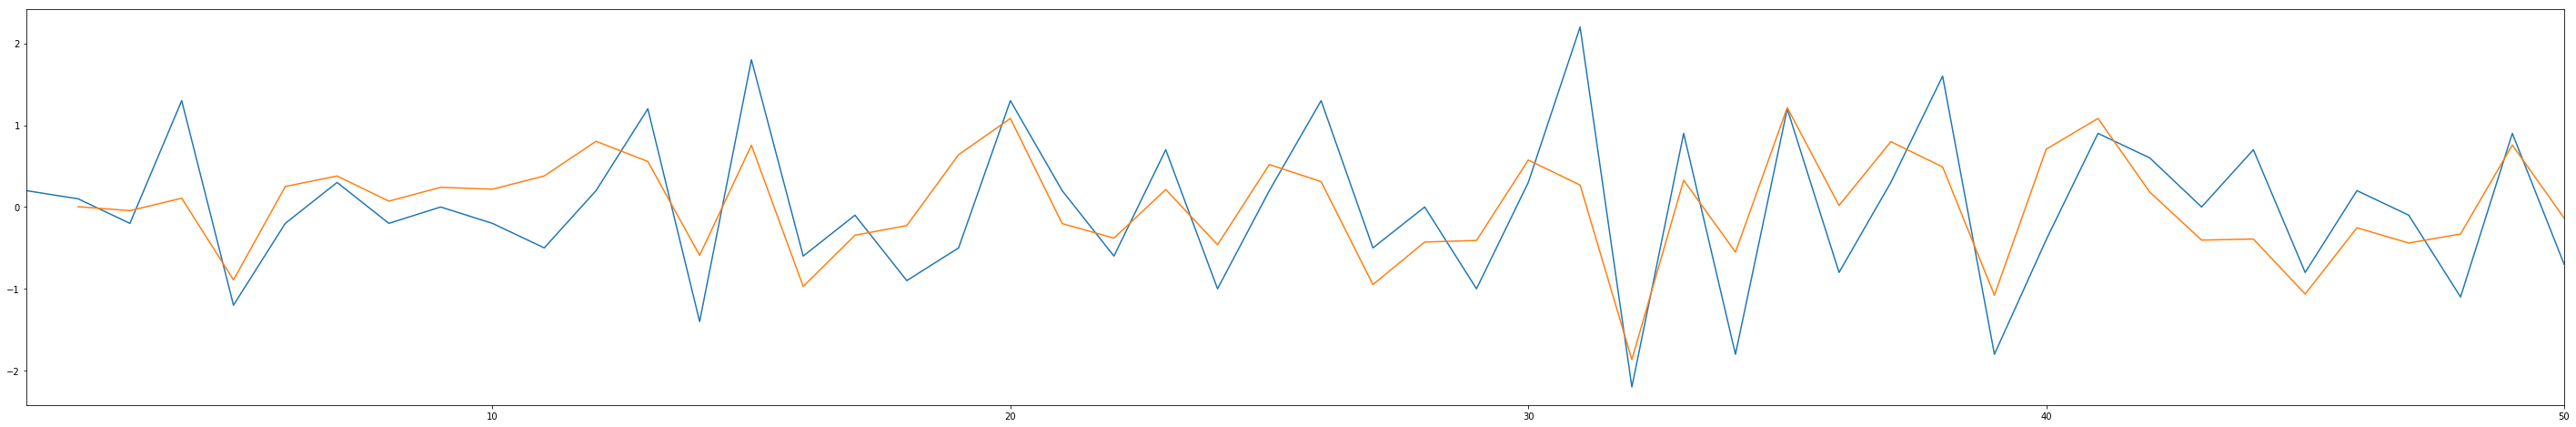

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


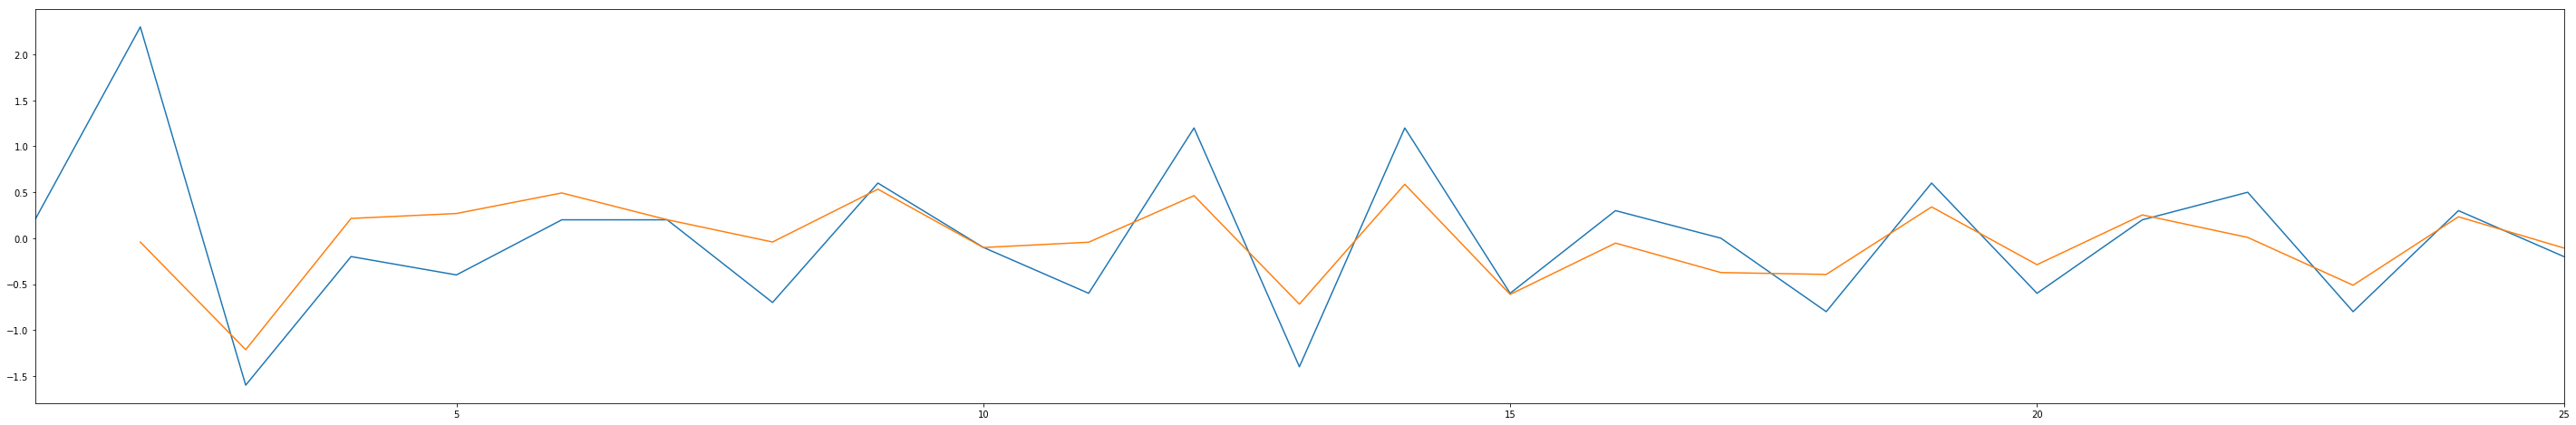

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


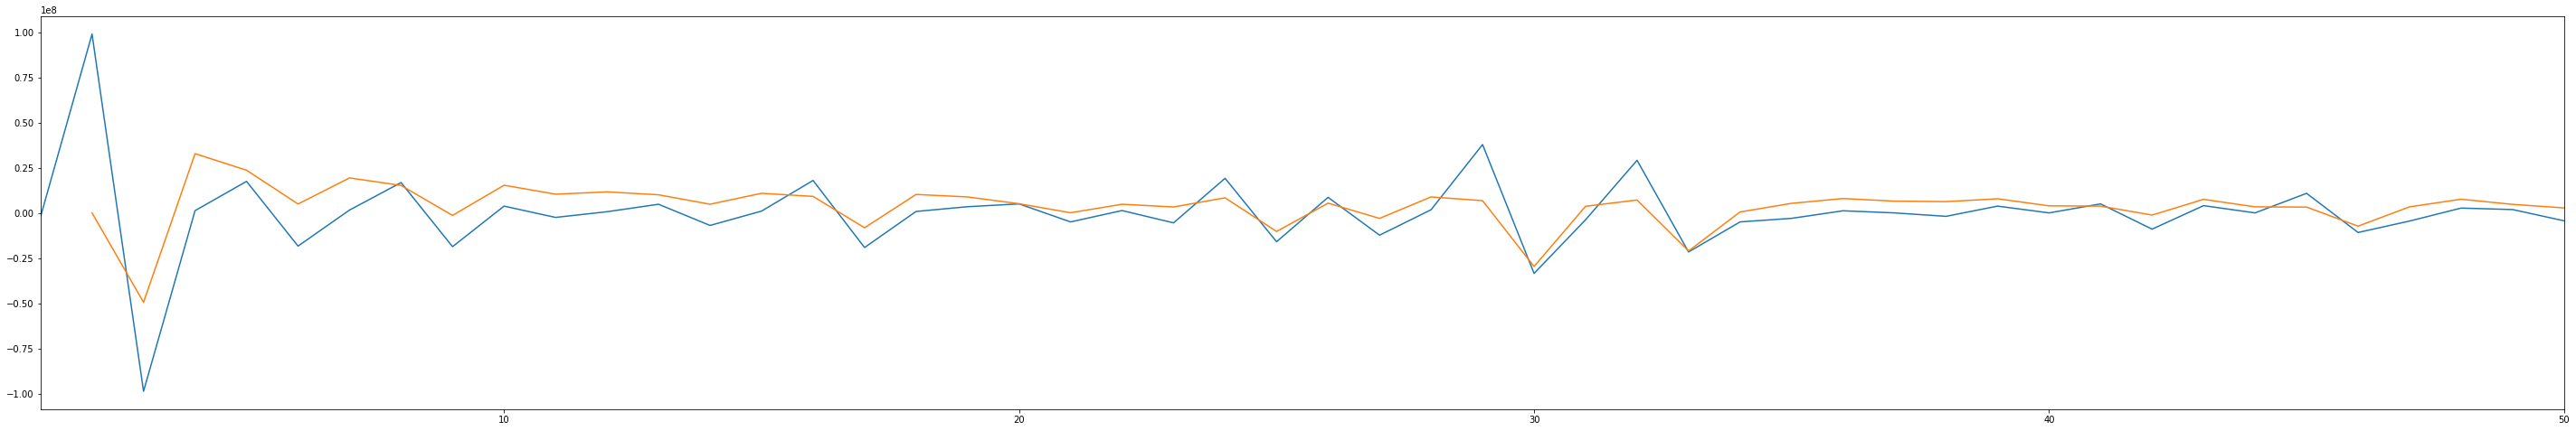

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


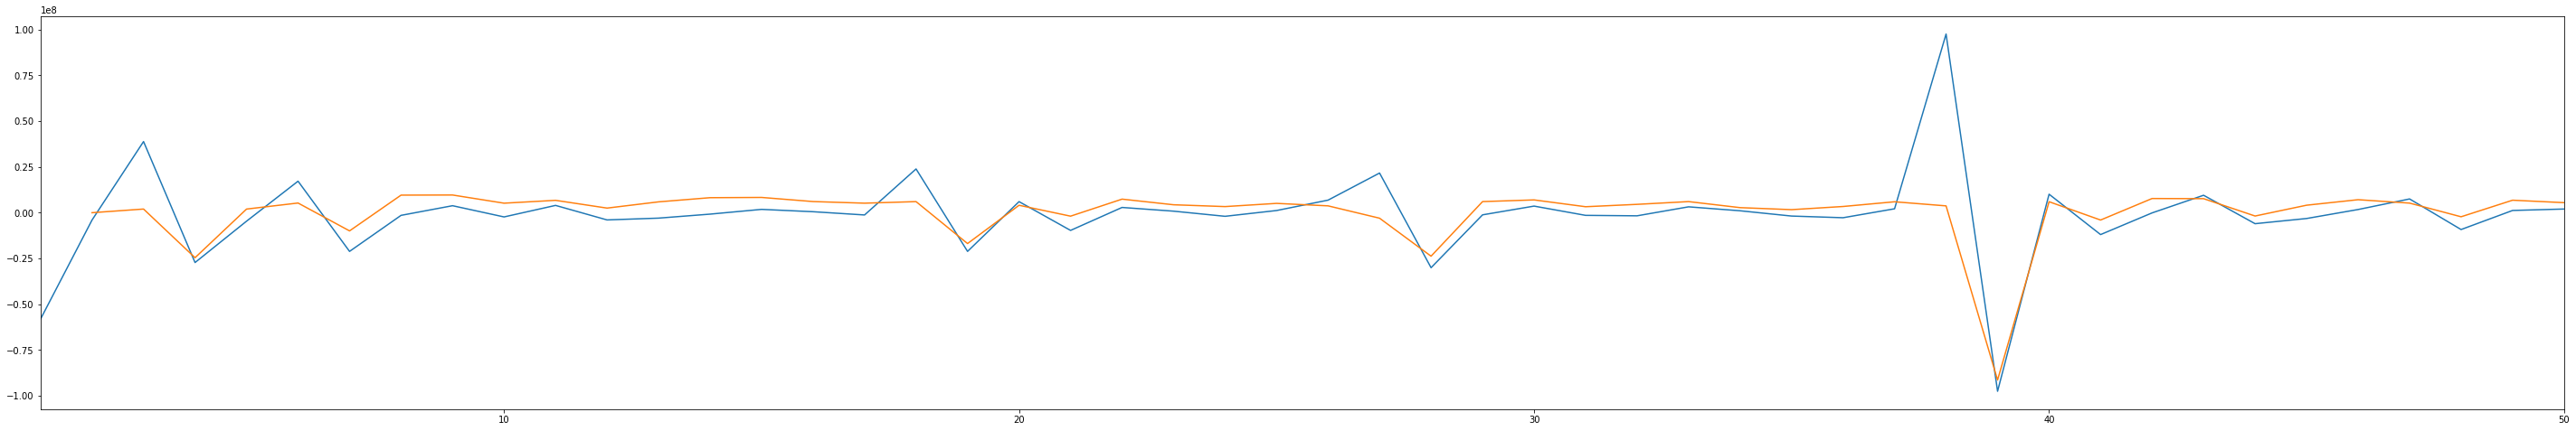

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


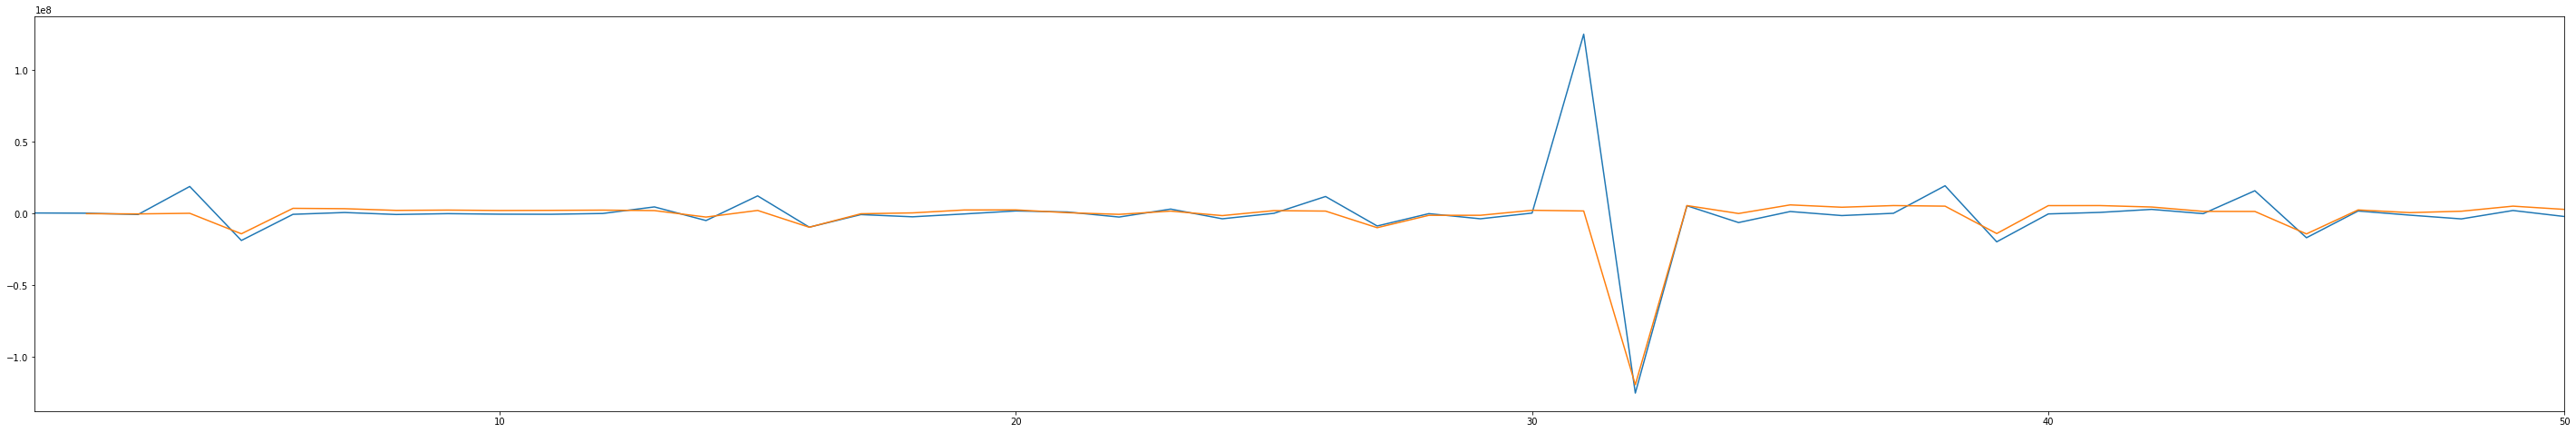

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


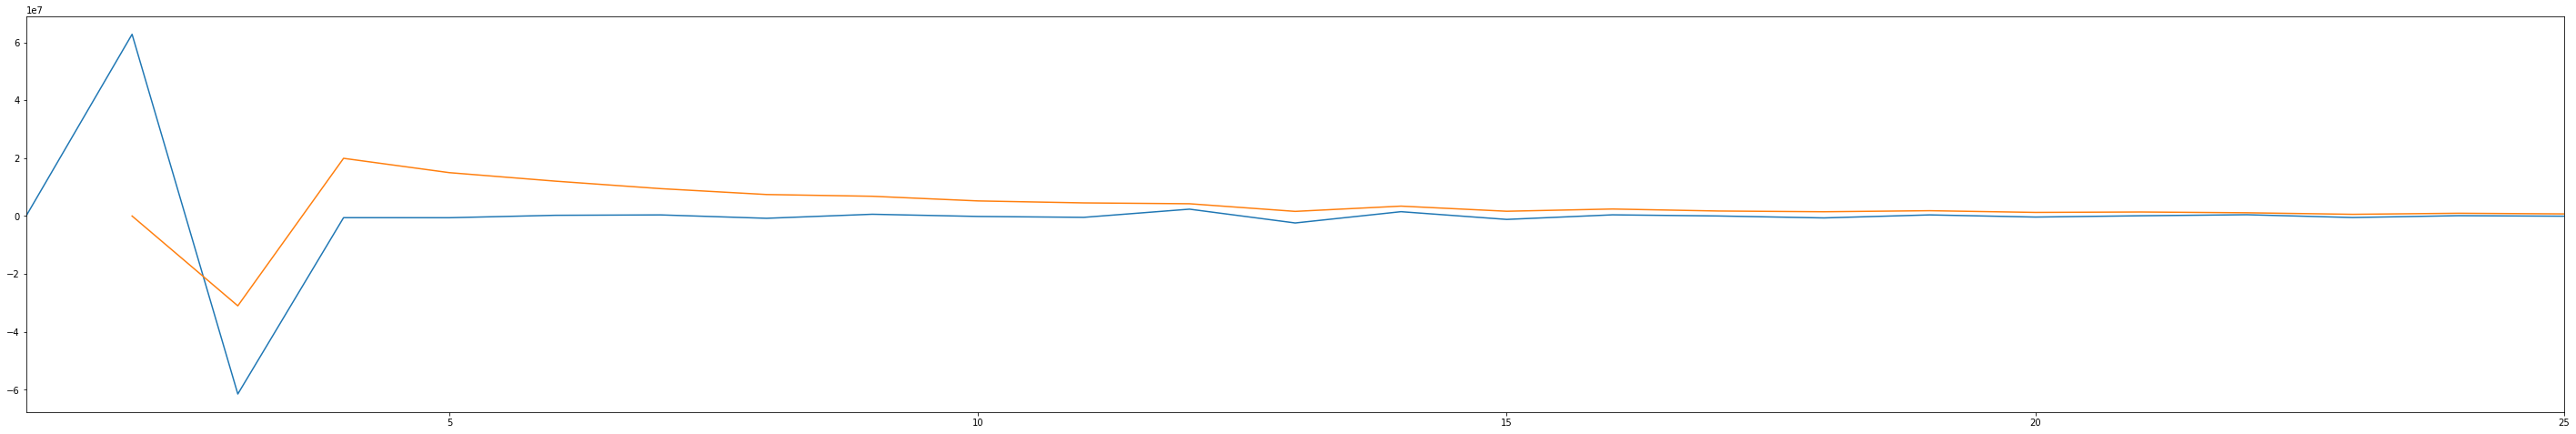

In [14]:
# 调用模型并输出结果
results_ThePacificOcean = model_MA(df_ThePacificOcean,'震级')
results_QinghaiTibetPlateau = model_MA(df_QinghaiTibetPlateau,'震级')
results_NorthWest = model_MA(df_NorthWest,'震级')
results_NorthChina = model_MA(df_NorthChina,'震级')
results_ThePacificOcean_ey = model_MA(df_ThePacificOcean_energy,'能量')
results_QinghaiTibetPlateau_ey = model_MA(df_QinghaiTibetPlateau_energy,'能量')
results_NorthWest_ey = model_MA(df_NorthWest_energy,'能量')
results_NorthChina_ey = model_MA(df_NorthChina_energy,'能量')

In [15]:
# 根据震级预测
# 预测2021年环太平洋地震带后1次地震震级
y_pred1 = results_ThePacificOcean.forecast(1)[0] 
print(y_pred1)
# 预测2021年西北地震带后1次地震震级
y_pred2 = results_QinghaiTibetPlateau.forecast(1)[0]
print(y_pred2)
# 预测2021年西北地震带后1次地震震级
y_pred3 = results_NorthWest.forecast(1)[0]
print(y_pred3)
# 预测2021年华北地震带后1次地震震级 
y_pred4 = y_pred = results_NorthChina.forecast(1)[0]
print(y_pred4)

[6.54438243]
[6.33999507]
[6.26777431]
[5.15072897]


In [18]:
# 根据能量预测
# 预测2021年环太平洋地震带后1次地震震级
import numpy as np
y_pred1 = results_ThePacificOcean_ey.forecast(1)[0] 
y_pred1 = np.log10(y_pred1)
print(y_pred1)
# 预测2021年西北地震带后1次地震震级
y_pred2 = results_QinghaiTibetPlateau_ey.forecast(1)[0]
y_pred2 = np.log10(y_pred2)
print(y_pred2)
# 预测2021年西北地震带后1次地震震级
y_pred3 = results_NorthWest_ey.forecast(1)[0]
y_pred3 = np.log10(y_pred3)
print(y_pred3)
# 预测2021年华北地震带后1次地震震级 
y_pred4 = y_pred = results_NorthChina_ey.forecast(1)[0]
y_pred4 = np.log10(y_pred4)
print(y_pred4)

[6.87662429]
[6.87127963]
[6.73659745]
[5.90068438]
